<a href="https://colab.research.google.com/github/JIBarrionuevoGaltier/DiploDatos2021_Grupo_4/blob/main/Trabajo_Pr%C3%A1ctico_Parte_2_DiploDatos_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRABAJO PRÁCTICO ENTREGABLE - PARTE II

# INTEGRANTES DEL GRUPO IV:
*   María Belén Acotto
*   Elías Ferreyra
*   Juan Ignacio Barrionuevo Galtier
*   Oscar Alejandro Oviedo
*   Gonzalo Heredia Edelstein

---

# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**
## **Edición 2021**

---

# Trabajo práctico entregable - Parte 2

In [2]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
from statsmodels.stats.power import tt_ind_solve_power

sns.set_context('talk')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [3]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [4]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [5]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                ...                     
                             count          mean  ...       75%        max
profile_gender                                    ...                     
Hombre                      4944.0  98836.063558  ...  110000.0  2080000.0
Mujer                        908.0  73501.414465  ...   92000.0   800000.0
Otros                         31.0  95441.354839  ...  117500.0   380000.0

[3 rows x 8 columns]

In [6]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                 ...                     
                             count           mean  ...       75%        max
profile_gender                                     ...                     
Hombre                      4815.0  101481.624343  ...  110000.0  2080000.0
Mujer                        863.0   77328.913778  ...   93000.0   800000.0
Otros                         28.0  105660.714286  ...  122750.0   380000.0

[3 rows x 8 columns]

In [7]:
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

In [8]:
## Alternativamente slicing para > 1000
df2 = df[df['salary_monthly_NETO'] > 1000]
df2[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                 ...                     
                             count           mean  ...       75%        max
profile_gender                                     ...                     
Hombre                      4815.0  101481.624343  ...  110000.0  2080000.0
Mujer                        863.0   77328.913778  ...   93000.0   800000.0
Otros                         28.0  105660.714286  ...  122750.0   380000.0

[3 rows x 8 columns]

In [9]:
df2_hombre = df2[df2['profile_gender'] == 'Hombre']
df2_otrosg = df2[df2['profile_gender'] != 'Hombre']

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros (diferencia de las medias entre el grupoA y grupoB). \\
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

Dos videos rápidos: \\
https://www.youtube.com/watch?v=6_V-bJlvR6Y&ab_channel=AlianzaEstadistica 

Intervalos de confianza \\
https://www.youtube.com/watch?v=TOLkF2jIr08&ab_channel=AlianzaEstadistica \\
Z-score

http://www.z-table.com/ \\

El intervalo de confianza para el valor de un estadístico para un determinado nivel de confianza, nos arroja los valores para los cuales una Hipótesis Nula que docime la posibildad de que el estadístico asuma alguno de los valores en cuestión no pueda ser rechazada.

### Estimación Puntual e intervalo de confianza grupo Hombres

Estimación puntual: Media del salario neto para el grupo Hombres \\
$\bar\mu_{A} = \frac{\sum_{A} SalarioNeto}{n_{A}} $

In [10]:
# Calcular el estadístico media muestral del grupo hombres
estadistico_media_hombres = df2_hombre['salary_monthly_NETO'].mean()
estadistico_media_hombres

101481.62434267918

Estimación puntual: Desviación estándar del salario neto del grupo Hombres \\
$ \sigma_{A} = \frac{\sqrt{\sum_{A} |x - \bar x |^{2}}}{(n_{A}-1)} $


In [11]:
# Calcular el estadístico desviación estándar del salario medio del grupo hombres
estadistico_desv_s_hombres = df2_hombre['salary_monthly_NETO'].std()
estadistico_desv_s_hombres

102215.30468444877

Intervalo de confianza para la media del salario neto del grupo Hombres \\
$ \langle \mu_{A;1-\alpha} \rangle = \bar x \pm z_{\frac{\alpha}{2}} \frac{\sigma_{A}}{n_{A}}$

$\alpha = 0.05$

In [12]:
alpha = 0.05

Como los tamaños muestrales para ambos grupos son los sufientemente grandes en este caso, pese a desconocer el valor real de la varianza poblacional, utilizamos el score Z y no el t de student, por aproximarse lo suficientemente bien.

$z_{\frac{\alpha}{2}} = 1.96 $

In [13]:
z_0975 = 1.96

$n_{A}$

In [14]:
nhombres = df2_hombre['salary_monthly_NETO'].count()
print(nhombres)

4815


Límite inferior del intervalo de confianza para la media del salario neto del grupo A

In [15]:
estadistico_media_hombres_liminf = estadistico_media_hombres - z_0975 * (estadistico_desv_s_hombres / nhombres)
estadistico_media_hombres_liminf

101440.01645126038

Límite superior del intervalo de confianza para la media del salario neto del grupo A

In [16]:
estadistico_media_hombres_limsup = estadistico_media_hombres + z_0975 * (estadistico_desv_s_hombres / nhombres)
estadistico_media_hombres_limsup

101523.23223409797

### Estimación Puntual e intervalo de confianza grupo Otros Géneros

In [17]:
# Calcular el estadístico media muestral del grupo B
estadistico_media_otrosg = df2_otrosg['salary_monthly_NETO'].mean()
estadistico_media_otrosg

78219.25094276095

In [18]:
estadistico_desv_s_otrosg = df2_otrosg['salary_monthly_NETO'].std()
estadistico_desv_s_otrosg

56515.32732350074

In [19]:
notrosg = df2_otrosg['salary_monthly_NETO'].count()
print(notrosg)

891


In [20]:
estadistico_media_otrosg_liminf = estadistico_media_otrosg - z_0975 * (estadistico_desv_s_otrosg / notrosg)
estadistico_media_otrosg_liminf

78094.92990846907

In [21]:
estadistico_media_otrosg_limsup = estadistico_media_otrosg + z_0975 * (estadistico_desv_s_otrosg / notrosg)
estadistico_media_otrosg_limsup

78343.57197705282

### Estimación puntual e intervalo de confianza para la diferencia de medias de grupos

INTERVALO DE CONFIANZA PARA LA DIFERENCIA DE MEDIAS

Sean $x_{11}, x_{12},...,x_{1n1}$ una muestra aleatoria de $n_{1}$ observaciones tomadas de una primera población con valor esperado $\mu_{1}$ y varianza $\sigma_{1}^{2}$ \\
Sean $x_{21}, x_{22},...,x_{2n2}$ una muestra aleatoria de $n_{2}$ observaciones tomadas de una primera población con valor esperado $\mu_{2}$ y varianza $\sigma_{2}^{2}$ \\
Si $\bar \mu_{1}, \bar \mu_{2} $ son las medias muestrales, entonces $\bar \mu_{1} - \bar \mu_{2}$ es un estimador puntual de $\mu_{1} - \mu_{2}$, y tiene una distribución normal si las dos poblaciones son normales, o aproximadamente normal si cumple con las condiciones del teorema del limite central (tamaños de muestras relativamentegrandes).
Por lo tanto,


$ z = \frac{\bar \mu_{1} - \bar \mu_{2} - (\mu_{1}-\mu_{2})}{\sqrt{\frac{\sigma_{1}^{2}}{n_{1}}+\frac{\sigma_{2}^{2}}{n_{2}}}}  $

Pese a desconocer las varianzas poblacionales se procede a la utilización del score Z y no t de student por tener un tamaño muestral que permite una aproximación bastante buena a la primera distribución. 

In [22]:
# Calcular la diferencia de medias entre grupos
## La diferencia de dos variables aleatorias es también una variable aleatoria.
dif_medias = estadistico_media_hombres - estadistico_media_otrosg
dif_medias

23262.37339991823

Esto nos dice que en promedio los "HOMBRES" cobran $23262.37 más que los demás géneros

El intervalo de confianza del estadístico diferencia de medias entre grupos viene entonces dado por: 

$\bar \mu_{1} - \bar \mu_{2}- z \sqrt{\frac{\sigma_{1}^{2}}{n_{1}}+\frac{\sigma_{2}^{2}}{n_{2}}} \leq \mu_{1}-\mu_{2} \leq \bar \mu_{1} - \bar \mu_{2}+ z \sqrt{\frac{\sigma_{1}^{2}}{n_{1}}+\frac{\sigma_{2}^{2}}{n_{2}}} $

Límite inferior para el intervalo de confianza del estadístico diferencia de medias:

In [23]:
#Límite inferior para el intervalo de confianza del estadístico diferencia de medias:
dif_medias_liminf = dif_medias - z_0975 * (((estadistico_desv_s_otrosg**2) / notrosg + (estadistico_desv_s_hombres**2) / nhombres)**(1/2))
dif_medias_liminf

18560.5807418027

Límite superior para el intervalo de confianza del estadístico diferencia de medias:

In [24]:
#Límite inferior para el intervalo de confianza del estadístico diferencia de medias:
dif_medias_limsup = dif_medias + z_0975 * ((estadistico_desv_s_otrosg**2 / notrosg + estadistico_desv_s_hombres**2 / nhombres)**(1/2))
dif_medias_limsup

27964.16605803376

El estadístico diferencia de medias de salario neto entre ambos grupos tiene una estimación puntual de $23262, y se encuentra con un 95% de confianza dentro del intervalo [18560; 27964]

## Ejercicio 2 Test de hipótesis:

**Consigna:**: Fomalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.


### 2.1 Formalización





Describir formalmente los distintos compenentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

Comenzamos por describir formalmente los cuatro componentes principales de un test de hipótesis:

- **Hipótesis Nula** denotada por $H_0$, es un valor o conjunto de valores que suponemos describen alguna característica de la distribución sobre la cual aplicaremos el test.

- **Hipótesis Alternativa** denotada por $H_1$ se establece en base a la evidencia que tenemos cuestionando la suposición realizanda por $H_0$.

- **Estadístico de prueba (pivote)**: es una variable aleatoria formada a partir de la información de la muestra. Compara la información de la muestra con la suposición de la hipótesis nula.

- **Valor crítico**: es un punto en la distribución del test que estemos aplicando que define la zona de rechazo de la hipótesis nula y la zona de no rechazo de la hipótesis nula.

Procedemos a comparar las distribuciones de SALARIO NETO en el grupo hombres contra el grupo otros géneros. 

http://homework.uoregon.edu/pub/class/es202/ztest.html

Decidimos utlizar la prueba Z.

Cuyo estadístico de prueba es:
$Z = \frac{\bar X_1 - \bar X_2}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}} $ 

In [25]:
difmed = (estadistico_media_hombres - estadistico_media_otrosg)
denominador = (estadistico_desv_s_hombres**2/nhombres + estadistico_desv_s_otrosg**2/notrosg)**(0.5)
Zobs = difmed/denominador
print('Zobs =', Zobs) 

Zobs = 9.697205976350695


### 2.2 P-valor


1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.
3. Los dos grupos de nuestra muestra tienen tamaños muy distintos. ¿Esto afecta al tests?

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

1. Por tratarse un estadístico Z observado mayor a cero, en nuestra prueba a dos colas estamos testeando la probabilidad de:

$2 \times P(Z \geq Z_{obs}) = 2 \times P(Z \geq 9.6972)  = 8.88178e^{-16} $


2. El valor del p-value encontrado es mucho menor que el del $\alpha$ propuesto (0.05), y en general menor que cualqueir $\alpha$ convencional para este tipo de tests. 

Significa que la probabilidad de que las medias muestrales (y por la tanto, las distribuciones muestrales) sean las mismas dada la información que tenemos es igual a $ 8.88178e^{-14} $%.

Se rechaza la hipótesis nula. Encontramos suficiente evidencia estadística para considerar a las medias del grupo 1 y grupo 2 diferentes entre si. 

3. Sí, afecta al test. 

Varios son los parámetros que hay que tener en cuenta. ¿Conocemos o no la desviación estándar poblacional? ¿Las varianzas muestrales son iguales? ¿Los tamaños muestrales son iguales?

Para cada caso la fórmula de cálculo del estadístico Z es distinta.

### [Opcional] 2.3 Potencia del test


Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

1. Utilizando la función statsmodels.stats.power.tt_ind_solve_power(effect_size=None, nobs1=None, alpha=None, power=None, ratio=1.0, alternative='two-sided')¶

effect_size - float \\
standardized effect size, difference between the two means divided by the standard deviation. effect_size has to be positive.

In [26]:
effectsize = estadistico_media_otrosg/estadistico_desv_s_otrosg - estadistico_media_hombres/estadistico_desv_s_hombres
effectsize

0.3912138531465166

Dada la restricción de que el parámetro debe ser positivo invertimos el orden de la diferencia.

ratio - float \\
ratio of the number of observations in sample 2 relative to sample 1. see description of nobs1 The default for ratio is 1; to solve for ratio given the other arguments it has to be explicitly set to None.

In [27]:
ratio_hg = nhombres/notrosg
ratio_hg

5.404040404040404

In [28]:
tt_ind_solve_power(effect_size=effectsize, nobs1=None, alpha=alpha, power=0.8, ratio = ratio_hg, alternative='two-sided')

61.074790803477185

In [29]:
tt_ind_solve_power(effect_size=effectsize, nobs1=None, alpha=alpha, power=0.9, ratio = ratio_hg, alternative='two-sided')

81.6596230102696

In [30]:
tt_ind_solve_power(effect_size=effectsize, nobs1=None, alpha=alpha, power=0.95, ratio = ratio_hg, alternative='two-sided')

100.91844178308361

Con la cantidad de observaciones que tenemos la potencia del test es elevadísima.

In [31]:
tt_ind_solve_power(effect_size=effectsize, nobs1=notrosg, alpha=alpha, power=None, ratio = ratio_hg, alternative='two-sided')

1.0

3.2. De Wikipedia:La potencia de una prueba estadística o el poder estadístico es la probabilidad de que la hipótesis alternativa sea aceptada cuando la hipótesis alternativa es verdadera (es decir, la probabilidad de no cometer un error del tipo II).

Para el ejercicio propuesto esto es: que la diferencia entre medias (y distribuciones) entre los grupos bajo análisis es diferente (aceptamos la hipótesis nula) y contamos con un test POTENTE (confiable) que respalda el resultado.

## Ejercicio 3: Comunicación y visualización




**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.

In [32]:
#medians
df2_hombre_median = df2_hombre["salary_monthly_NETO"].median()
df2_otrosg_median = df2_otrosg["salary_monthly_NETO"].median()
df2_hombre_median
df2_otrosg_median

67310.0

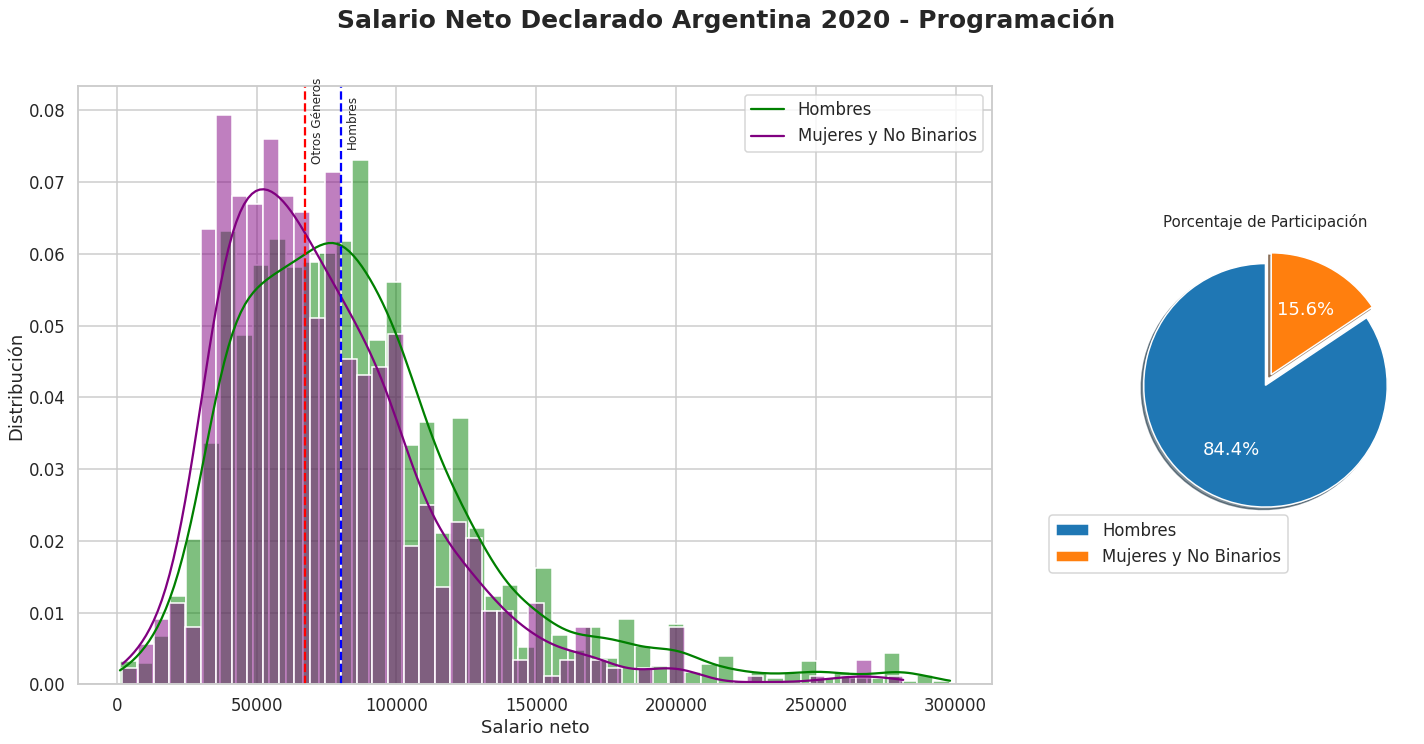

In [80]:
# densidad de probabilidad normalizada
max_SMB = 300000
sub_dfh = df2_hombre[df2_hombre["salary_monthly_NETO"] < max_SMB]
sub_dfo = df2_otrosg[df2_otrosg["salary_monthly_NETO"] < max_SMB]
fig, axes = plt.subplots(1, 2,figsize=(24,11),gridspec_kw={'width_ratios': [3, 1]})
gridspec_kw={'width_ratios': [3, 1]}
sns.set_style('whitegrid')

sns.histplot(data=sub_dfh, x="salary_monthly_NETO", kde=True, bins=50, color='green', stat= 'probability', ax=axes[0])
sns.histplot(data=sub_dfo, x="salary_monthly_NETO", kde=True, bins=50, color='purple', stat= 'probability',ax=axes[0])
plt.ylim(0, 0.12)
axes[0].axvline(df2_otrosg_median, linestyle = '--', color = 'red', mew = 5)
axes[0].text(df2_otrosg_median+2000, 0.073, 'Otros Géneros', rotation = 90, fontsize=12)
axes[0].axvline(df2_hombre_median, linestyle = '--', color = 'blue', mew = 5)
axes[0].text(df2_hombre_median+2000, 0.075, 'Hombres', rotation = 90, fontsize=12)
axes[0].set(xlabel='Salario neto', ylabel='Distribución')
axes[0].legend(loc=0, labels=df_gen['Perfiles'],bbox_to_anchor=(1,1))

df_gen = df2.loc[:,'profile_gender'].to_frame()
df_gen.loc[df_gen['profile_gender']!='Hombre', 'profile_gender'] = 'Mujeres y No Binarios'
df_gen.loc[df_gen['profile_gender']=='Hombre', 'profile_gender'] = 'Hombres'
df_gen = df_gen[['profile_gender']].groupby(['profile_gender']).size().to_frame()
df_gen = df_gen.reset_index(level=['profile_gender'])
df_gen = df_gen.rename(columns = {0:'Cantidad','profile_gender':'Perfiles'})

df_gen.plot(kind='pie', y = 'Cantidad', ax=axes[1], autopct='%1.1f%%',  startangle=90, shadow=True, labels=None, explode=(0, 0.1), legend = True, fontsize=18, textprops = dict(color ="white"))
axes[1].legend(loc=0, labels=df_gen['Perfiles'],bbox_to_anchor=(0.6,0.1))
axes[1].set_title('Porcentaje de Participación', fontsize=15)
axes[1].get_yaxis().set_visible(False)

fig.suptitle('Salario Neto Declarado Argentina 2020 - Programación', fontsize=25,fontweight='bold')
plt.show()

**En programación, la brecha salarial entre hombres y otros géneros supera el 30%**

Los hombres cobran un salario 30,7% mayor que otros géneros. El salario neto promedio de los hombres es de ARS 102.215, mientras que para el resto de los trabajadores es de ARS 78.219. El sector muestra una elebada concentración de hombres con un 84.4%, mientras que el resto de trabajadores representa el 16.6%.

Publicación en LinkedIn: [Link de LinkedIn](https://www.linkedin.com/posts/juan-ignacio-barrionuevo-galtier_anaerlisis-diplomatura-diplomados-activity-6808746268534288384-o-oj)